# Advanced Functions - Nested Functions

You can nest functions inside other functions.  In this way, you can contain these nested functions to ensure they're only accessible inside the outer functions.  This can be useful if you want to ensure that any data being used is processed in a specific way beforehand, depending on the way you call the function.

In [7]:
def outer_function(x):
    def inner_function1(x):
        print(x,"was given.")
    def inner_function2(x):
        print(x**2,"is x squared")
    inner_function1(x)
    inner_function2(x)

outer_function(4)

4 was given.
16 is x squared


As you can see, `outer_function` calls its own `inner_function`s without issue.  Let's try calling the `inner_function`s directly.

In [8]:
inner_function1(4)

NameError: name 'inner_function1' is not defined

Now we get an error.  This is because the inner functions only exist in the scope of the outer function.  These small examples illustrate the concept in a basic way, but let's consider a more complicated function.

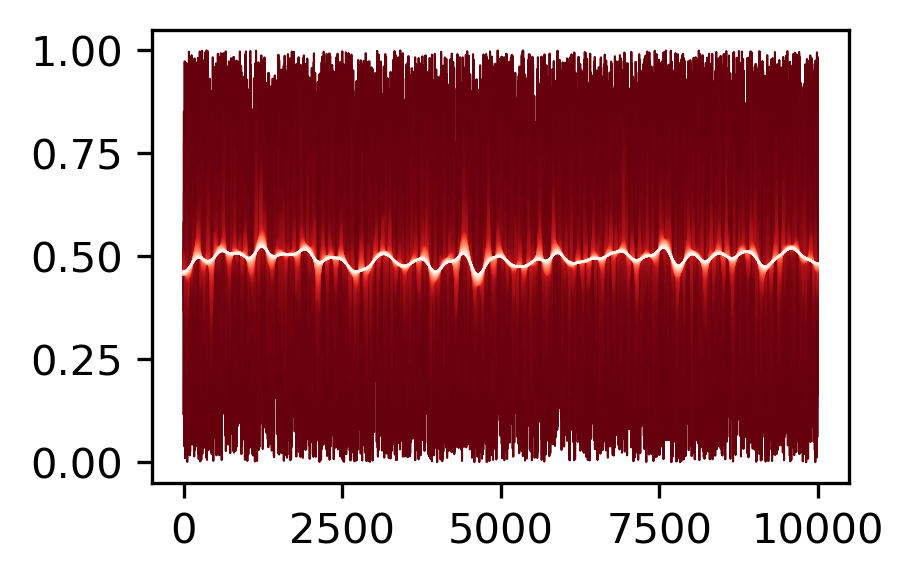

In [29]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.cm as cm

def plot_with_smoothing(data,sigma):
    """Takes data and a smoothing factor sigma and plots the raw data plus the smoothed data"""
    cmap = cm.get_cmap("Reds_r")
    fig = plt.figure(figsize=[3,2],dpi=300)
    ax = fig.add_subplot(1,1,1)
    def smoothing(data,sigma,color):
        """Plots the smoothed data"""
        ax.plot(gaussian_filter(data,sigma=sigma),color=color,lw=0.5)
    # ax.plot(data,color="grey",lw=0.5)
    for i in range(sigma):
        smoothing(data,i,cmap(i/sigma))

data = np.random.rand(10000)
plot_with_smoothing(data,100)

Internally defined functions can also allow you to use the same function name in many different contexts.  It can be helpful when you have functions that are doing some small task a large number of times, but in a different way depending on the context.  In the above example, `smoothing` works on 1-dimensional data.  There are other occasions where you may have 2-dimensional data, which requires different techniques to smooth properly.  Therefore, you might want to ensure that the smoothing functions for 1-d data and 2-d data are kept isolated to prevent misuse.

Internal functions can also be called as results of if-else statements or other conditional checks.

# Advanced Functions - Decorators

Decorators are another version of nested functions, but in the opposite direction.  Let's say you want to 


In [46]:
### The function 'wrapper' takes the function as an argument, and the nested function 'wrapped' uses the incoming arguments in the external function.
### This allows you to pass arguments through a decorator.
### The decorator does its own stuff around the called function.
def decorator_function(func):
    def wrapper_function(*args,**kwargs):
        print("Before the function!")
        result = func(*args,**kwargs)
        print("After the function!")
        return result
    return wrapper_function


@decorator_function ### Here's where we "wrap" the new function rather than having to nest the entire thing inside the decorator.
def f(x):
    print(f"The value of x is {x}.  Returning x**2")
    return x**2

answer = f(5)
print(answer)

Before the function!
The value of x is 5.  Returning x**2
After the function!
25


Decorators are extremely useful tools, especially with larger projects.  You can also have multiple decorators on a single function, which can further expand your code!


In [50]:
from datetime import datetime as dt

def timing_wrapper(func):
    def wrapped(*args,**kwargs):
        start = dt.now()
        print("Start time is ",start)
        result = func(*args,**kwargs)
        end = dt.now()
        print("End time is ",end)
        print("Total Time:",end - start)
        return result
    return wrapped

@timing_wrapper
@decorator_function
def g(x):
    print("X is ",x,"\nReturning -X.")
    return -x

g(6)

Start time is  2022-06-14 16:55:36.759226
Before the function!
X is  6 
Returning -X.
After the function!
End time is  2022-06-14 16:55:36.759419
Total Time: 0:00:00.000193


-6

This shows us that the order of our decorators matters quite a bit.  The first decorator in the list is the outermost decorator, then the next one, and so forth.

You can also include additional functionality inside decorators that can make things easier in your code.

For example, let's say I have a function that opens a file and reads the first line.  I might want to be sure the file exists before I try to open it.  Now, this is something I can do in every function that has a file being opened and read, which means more code being written and more to sift through if something goes wrong.  However, if I am consistent in my variable naming conventions (most people develop a style of their own - unless you work for a company with their own established style requirements), I can do things like check for a file's existence before passing the filename on to the reading function.  Let's see how that might look.

I'll use the `glob` library that comes standard with `python`.


In [57]:
from glob import glob

def check_file_exists(func):
    def wrapper(*args,**kwargs):
        if glob(kwargs["filename"]):
            return func(*args,**kwargs)
        else:
            print(args)
            print(kwargs)
            print("File does not exist")
    return wrapper

@check_file_exists
def read_first_line(filename):
    with open(filename) as f:
        print(f.readline())
    f.close()

read_first_line(filename="test.txt")
read_first_line(filename="09_Functions_Advanced.ipynb") ## This is this very notebook, so it should return an actual result... which is just a "{".


()
{'filename': 'test.txt'}
File does not exist
{



It should be noted that even though the `read_first_line` function uses the positional argument "filename", if the function is called without the explicit keyword argument `filename="test.txt"`, there will be an error in the wrapper.  So take the knowledge that you can mess with parameters inside a wrapper with a grain of salt - you can also make a big ol' mess.

In [ ]:
### For future use, here's a basic template!
def decorator_name(func):
    def wrapper(*args,**kwargs):
        return func(*args,**kwargs)
    return wrapper